# Movie Reviews Positive or Negative?

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import gutenberg, stopwords
from collections import Counter
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
clf = ensemble.GradientBoostingClassifier()
from sklearn.feature_extraction.text import TfidfVectorizer as TFIV
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import re
from bs4 import BeautifulSoup
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from bs4 import BeautifulSoup

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## About the Dataset

This data came from a kaggle event that scrapped the IMDB movie review webpage. The data set has 25,000 movie reviews. The reviews breaks down whether the reviewer liked the movie 1 would mean the review gave the movie a positive review and 0 would mean the opposite.

In [3]:
df_train = pd.read_csv("labeledTrainData.tsv",delimiter='\t',encoding='utf-8')

In [7]:
df_train.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [63]:
df_train.shape

(25000, 3)

The mean is at .50, since the score will either be 0 or 1 this means there is a perfect balance between good reviews and bad reviews. 

In [8]:
df_train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


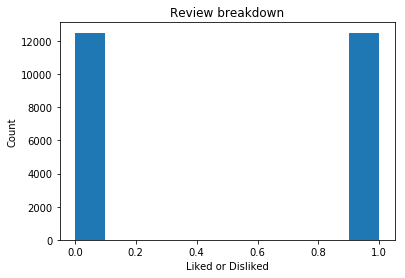

In [11]:
plt.hist(df_train['sentiment'])
plt.title('Review breakdown')
plt.xlabel('Liked or Disliked')
plt.ylabel('Count')
plt.show()

In [4]:
def review_to_wordlist(review):
    '''
    Meant for converting each of the IMDB reviews into a list of words.
    '''
    # First remove the HTML.
    review_text = BeautifulSoup(review).get_text()
        
    # Use regular expressions to only include words.
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
        
    # Convert words to lower case and split them into separate words.
    words = review_text.lower().split()
       
    # Return a list of words
    return(words)

In [8]:
traindata = []
for i in range(0,len(df_train['review'])):
    traindata.append(" ".join(review_to_wordlist(df_train['review'][i])))
    

In [9]:
y = df_train['sentiment']

 ## TFIDF

In [10]:
tfv = TFIV(min_df=3,  max_features=None, 
        strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}',
        ngram_range=(1, 2), use_idf=1, smooth_idf=1, sublinear_tf=1,
        stop_words = 'english')

In [14]:
'''X_all = traindata 
lentrain = len(traindata)

tfv.fit(X_all) 
X_all = tfv.transform(X_all)

X_train = X_all[:lentrain] 
X_test = X_all[lentrain:]'''

In [15]:
X_train.shape

(25000, 160021)

In [17]:
X_train, X_test, y_train, y_test  = train_test_split(X_train, y, test_size=0.25, random_state=0)

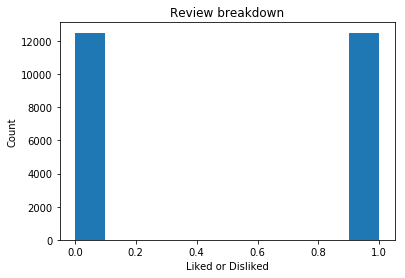

In [19]:
plt.hist(y)
plt.title('Review breakdown')
plt.xlabel('Liked or Disliked')
plt.ylabel('Count')
plt.show()

I wanted to verify the reviews were still unbiased, looks good

## Model Tuning

#### Logistic Regression

In [115]:
lr_params = {'C':np.arange(0.00001, 3, .01)}

In [123]:
lr = LogisticRegression()
gs_lr = GridSearchCV(lr, lr_params, return_train_score=True, n_jobs =-1)
gs_lr.fit(X,y_train)

print(gs_lr.best_params_)

{'C': 2.9300100000000002}


In [124]:
lr_params = {'C':np.arange(2.5, 8, .01)}

In [125]:
lr = LogisticRegression()
gs_lr = GridSearchCV(lr, lr_params, return_train_score=True, n_jobs =-1)
gs_lr.fit(X,y_train)

print(gs_lr.best_params_)

{'C': 6.929999999999906}


In [21]:
lr = LogisticRegression(C= 6.929999999999906)

In [22]:
cross_val_score(lr, X_train, y_train, cv=5)

array([0.89253333, 0.89413333, 0.89973333, 0.88826667, 0.89573333])

In [23]:
cross_val_score(lr, X_test, y_test, cv=5)

array([0.8768, 0.872 , 0.8872, 0.8736, 0.8704])

In [24]:
scoring = ['precision_macro', 'recall_macro']
lr_scores = cross_validate(lr, X_train, y_train, scoring=scoring,
             cv=5, return_train_score=True)
sorted(lr_scores.keys())
lr_scores

{'fit_time': array([0.51158738, 0.52996898, 0.50531054, 0.50287175, 0.49505997]),
 'score_time': array([0.00598359, 0.00498652, 0.00498724, 0.00498724, 0.        ]),
 'test_precision_macro': array([0.89257278, 0.89428688, 0.89975481, 0.88837213, 0.89621102]),
 'train_precision_macro': array([0.99766581, 0.99833276, 0.99786594, 0.99799927, 0.99813236]),
 'test_recall_macro': array([0.89251773, 0.89410238, 0.89972207, 0.88824078, 0.89567851]),
 'train_recall_macro': array([0.99766771, 0.99833396, 0.9978675 , 0.99800083, 0.99813459])}

In [25]:
lr.fit(X_train, y_train);
y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2799,  356],
       [ 277, 2818]], dtype=int64)

In [26]:
lr_y_score = lr.fit(X_train, y_train).decision_function(X_test)

In [27]:
lr_score = roc_auc_score(y_test, lr_y_score)

In [33]:
lr_fpr, lr_tpr, lr_thresholds = metrics.roc_curve(y_test, lr_y_score)

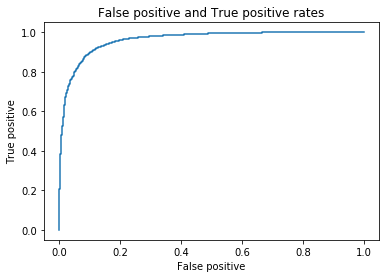

In [32]:
plt.figure()
plt.plot(fpr, tpr)
plt.title('False positive and True positive rates')
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.show()

#### Gradiant Boosting

In [128]:
gb_params = {'n_estimators':range(1, 50,1),
         'max_depth': range(1, 10),
         'max_features': ('sqrt', 'log2')}

In [129]:
gb = ensemble.GradientBoostingClassifier()
gs = GridSearchCV(gb, gb_params, return_train_score=True, n_jobs =-1)
gs.fit(X,y_train)

print(gs.best_params_)

{'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 49}


In [132]:
gb_params = {'n_estimators':range(45, 100,1),
         'max_depth': range(7, 15),
         'max_features': ('sqrt', 'log2')}

In [133]:
gb = ensemble.GradientBoostingClassifier()
gs = GridSearchCV(gb, gb_params, return_train_score=True, n_jobs =-1)
gs.fit(X,y_train)

print(gs.best_params_)

{'max_depth': 14, 'max_features': 'sqrt', 'n_estimators': 97}


In [134]:
gb_params = {'n_estimators':range(90, 140,1),
         'max_depth': range(12, 18),
         'max_features': ('sqrt', 'log2')}

In [135]:
gb = ensemble.GradientBoostingClassifier()
gs = GridSearchCV(gb, gb_params, return_train_score=True, n_jobs =-1)
gs.fit(X,y_train)

print(gs.best_params_)

{'max_depth': 16, 'max_features': 'sqrt', 'n_estimators': 138}


In [136]:
gb_params = {'n_estimators':range(135, 180,1),
         'max_depth': range(15, 21),
         'max_features': ('sqrt', 'log2')}

In [137]:
gb = ensemble.GradientBoostingClassifier()
gs = GridSearchCV(gb, gb_params, return_train_score=True, n_jobs =-1)
gs.fit(X,y_train) 

print(gs.best_params_)

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 163}


In [144]:
gb_params = {'n_estimators':range(155, 190,1),
         'max_depth': range(19, 25),
         'max_features': ('sqrt', 'log2')}

In [145]:
gb = ensemble.GradientBoostingClassifier()
gs = GridSearchCV(gb, gb_params, return_train_score=True, n_jobs =-1)
gs.fit(X,y_train) 

print(gs.best_params_)

{'max_depth': 24, 'max_features': 'sqrt', 'n_estimators': 185}


In [150]:
gb_params = {'n_estimators':range(180, 210,1),
         'max_depth': range(24, 29)}

In [151]:
gb = ensemble.GradientBoostingClassifier(max_features = 'sqrt')
gs = GridSearchCV(gb, gb_params, return_train_score=True, n_jobs =-1)
gs.fit(X,y_train) 

print(gs.best_params_)

{'max_depth': 24, 'n_estimators': 188}


In [152]:
gb_params = {'max_depth': range(10, 25)}

In [153]:
gb = ensemble.GradientBoostingClassifier(max_features = 'sqrt', n_estimators =188)
gs = GridSearchCV(gb, gb_params, return_train_score=True, n_jobs =-1)
gs.fit(X,y_train) 

print(gs.best_params_)

{'max_depth': 17}


In [34]:
gb = ensemble.GradientBoostingClassifier(max_features = 'sqrt', max_depth = 17, n_estimators =188)
cross_val_score(gb, X_train, y_train, cv=5)

array([0.8608    , 0.86106667, 0.8704    , 0.85893333, 0.86373333])

In [59]:
cross_val_score(gb, X_test, y_test, cv=5)

array([0.8488, 0.8488, 0.8472, 0.832 , 0.8512])

In [36]:
scoring = ['precision_macro', 'recall_macro']
gb_scores = cross_validate(gb, X_train, y_train, scoring=scoring,
             cv=5, return_train_score=True)
sorted(gb_scores.keys())
gb_scores

{'fit_time': array([17.13336754, 16.96518326, 17.40877771, 16.99368834, 16.86264133]),
 'score_time': array([0.14316797, 0.13687038, 0.14736891, 0.14059186, 0.14059186]),
 'test_precision_macro': array([0.86397045, 0.86209079, 0.86686635, 0.8640676 , 0.86268983]),
 'train_precision_macro': array([0.99993355, 0.99993313, 0.99993355, 0.99993355, 1.        ]),
 'test_recall_macro': array([0.86340724, 0.86126023, 0.86606199, 0.86397813, 0.8615124 ]),
 'train_recall_macro': array([0.99993312, 0.99993355, 0.99993312, 0.99993312, 1.        ])}

In [37]:
gb.fit(X_train, y_train);
gb_y_pred = gb.predict(X_test)
confusion_matrix(y_test, gb_y_pred)

array([[2689,  466],
       [ 332, 2763]], dtype=int64)

In [38]:
gb_y_score = gb.fit(X_train, y_train).decision_function(X_test)
gb_score = roc_auc_score(y_test, gb_y_score)
gb_fpr, gb_tpr, gb_thresholds = metrics.roc_curve(y_test, gb_y_score)

#### Random Forest

In [140]:
rfr_params = {'n_estimators':range(1, 125,1),
         'max_depth': range(2, 6),
         'criterion': ('gini', 'entropy'),
         'max_features': ('sqrt', 'log2') }

In [141]:
rfr = ensemble.RandomForestClassifier()
rfr_gs = GridSearchCV(rfr, rfr_params, return_train_score=True, n_jobs =-1)
rfr_gs.fit(X,y_train)

print(rfr_gs.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 124}


In [142]:
rfr_params = {'n_estimators':range(119, 170,1),
         'max_depth': range(5, 10),
         'criterion': ('gini', 'entropy'),
         'max_features': ('sqrt', 'log2') }

In [143]:
rfr = ensemble.RandomForestClassifier()
rfr_gs = GridSearchCV(rfr, rfr_params, return_train_score=True, n_jobs =-1)
rfr_gs.fit(X,y_train)

print(rfr_gs.best_params_)

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 168}


In [154]:
rfr_params = {'n_estimators':range(165, 200,1),
         'max_depth': range(9, 14),
         'criterion': ('gini', 'entropy'),
         'max_features': ('sqrt', 'log2') }

In [155]:
rfr = ensemble.RandomForestClassifier()
rfr_gs = GridSearchCV(rfr, rfr_params, return_train_score=True, n_jobs =-1)
rfr_gs.fit(X,y_train)

print(rfr_gs.best_params_)

{'criterion': 'entropy', 'max_depth': 13, 'max_features': 'sqrt', 'n_estimators': 184}


In [156]:
rfr_params = {'n_estimators':range(165, 200,1),
         'max_depth': range(12, 18),
         'criterion': ('gini', 'entropy'),
         'max_features': ('sqrt', 'log2') }

In [157]:
rfr = ensemble.RandomForestClassifier()
rfr_gs = GridSearchCV(rfr, rfr_params, return_train_score=True, n_jobs =-1)
rfr_gs.fit(X,y_train)
 
print(rfr_gs.best_params_)

{'criterion': 'gini', 'max_depth': 17, 'max_features': 'sqrt', 'n_estimators': 177}


In [158]:
rfr_params = {'n_estimators':range(165, 200,1),
         'max_depth': range(16, 23),
         'criterion': ('gini', 'entropy')}

In [160]:
rfr = ensemble.RandomForestClassifier(max_features = 'sqrt')
rfr_gs = GridSearchCV(rfr, rfr_params, return_train_score=True, n_jobs =-1)
rfr_gs.fit(X,y_train)
 
print(rfr_gs.best_params_)

{'criterion': 'gini', 'max_depth': 22, 'n_estimators': 187}


In [161]:
rfr_params = {'n_estimators':range(165, 200,1),
         'max_depth': range(21, 25),
         'criterion': ('gini', 'entropy')}

In [162]:
rfr = ensemble.RandomForestClassifier(max_features = 'sqrt')
rfr_gs = GridSearchCV(rfr, rfr_params, return_train_score=True, n_jobs =-1)
rfr_gs.fit(X,y_train)
 
print(rfr_gs.best_params_)

{'criterion': 'gini', 'max_depth': 23, 'n_estimators': 176}


In [163]:
rfr_params = {'n_estimators':range(170, 200,1),
         'max_depth': range(23, 28),
         'criterion': ('gini', 'entropy')}

In [164]:
rfr = ensemble.RandomForestClassifier(max_features = 'sqrt')
rfr_gs = GridSearchCV(rfr, rfr_params, return_train_score=True, n_jobs =-1)
rfr_gs.fit(X,y_train)
 
print(rfr_gs.best_params_)

{'criterion': 'gini', 'max_depth': 27, 'n_estimators': 185}


In [165]:
rfr_params = {'n_estimators':range(170, 200,1),
         'max_depth': range(26, 32),
         'criterion': ('gini', 'entropy')}

In [166]:
rfr = ensemble.RandomForestClassifier(max_features = 'sqrt')
rfr_gs = GridSearchCV(rfr, rfr_params, return_train_score=True, n_jobs =-1)
rfr_gs.fit(X,y_train)
 
print(rfr_gs.best_params_)

{'criterion': 'entropy', 'max_depth': 28, 'n_estimators': 183}


In [39]:
rfr = ensemble.RandomForestClassifier(max_features = 'sqrt', criterion ='entropy', max_depth= 28, n_estimators=183)
cross_val_score(rfr, X_train, y_train, cv=5)

array([0.83466667, 0.8448    , 0.85013333, 0.8456    , 0.84106667])

In [60]:
cross_val_score(rfr, X_test, y_test, cv=5)

array([0.832 , 0.8384, 0.8512, 0.8336, 0.8472])

In [41]:
scoring = ['precision_macro', 'recall_macro']
rfr_scores = cross_validate(rfr, X_train, y_train, scoring=scoring,
             cv=5, return_train_score=True)
sorted(rfr_scores.keys())
rfr_scores

{'fit_time': array([17.98378134, 18.17069459, 18.22402215, 17.78232384, 17.56260872]),
 'score_time': array([0.95707393, 1.03059006, 0.99849629, 0.96918249, 0.95298338]),
 'test_precision_macro': array([0.8354406 , 0.84152442, 0.8520579 , 0.84697919, 0.84432981]),
 'train_precision_macro': array([0.95998826, 0.95819643, 0.95748951, 0.95610378, 0.95910432]),
 'test_recall_macro': array([0.83431041, 0.83934214, 0.85029009, 0.8460541 , 0.84173107]),
 'train_recall_macro': array([0.95865163, 0.95616467, 0.9557732 , 0.95361979, 0.95689353])}

In [42]:
rfr.fit(X_train,y_train)
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [43]:
forest_features = pd.DataFrame()
forest_features['importance'] = rfr.feature_importances_
forest_features['features'] = X_train
sorted_forest = forest_features.sort_values('importance', ascending=False)

In [44]:
rfr.fit(X_train, y_train);
rfr_y_pred = rfr.predict(X_test)
confusion_matrix(y_test, rfr_y_pred)

array([[2564,  591],
       [ 349, 2746]], dtype=int64)

In [46]:
rfr_y_score = rfr.fit(X_train, y_train).decision_function(X_test)
rfr_score = roc_auc_score(y_test, rfr_y_score)
rfr_fpr, rfr_tpr, rfr_thresholds = metrics.roc_curve(y_test, rfr_y_score)

AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

#### KNN

In [167]:
knn_params = {'n_neighbors':range(1, 350,1),
         'weights': ('uniform', 'distance')}

In [170]:
neighbors = KNeighborsClassifier()
gs_knn = GridSearchCV(neighbors, knn_params, return_train_score=True, n_jobs =-1)
gs_knn.fit(X,y_train)

print(gs_knn.best_params_)

{'n_neighbors': 148, 'weights': 'distance'}


In [48]:
knn =  KNeighborsClassifier(n_neighbors = 148, weights = 'distance')
cross_val_score(knn, X_train, y_train, cv=5)

array([0.84533333, 0.84986667, 0.8616    , 0.848     , 0.85386667])

In [49]:
cross_val_score(knn, X_test, y_test, cv=5)

array([0.824 , 0.8088, 0.832 , 0.8064, 0.8176])

In [50]:
scoring = ['precision_macro', 'recall_macro']
knn_scores = cross_validate(knn, X_train, y_train, scoring=scoring,
             cv=5, return_train_score=True)
sorted(knn_scores.keys())
knn_scores

{'fit_time': array([0.06083679, 0.06248665, 0.09482336, 0.05983996, 0.05884266]),
 'score_time': array([6.06815743, 5.93222213, 6.99359775, 5.70673156, 5.70872617]),
 'test_precision_macro': array([0.84632312, 0.85065984, 0.86177245, 0.84943645, 0.85420654]),
 'train_precision_macro': array([1., 1., 1., 1., 1.]),
 'test_recall_macro': array([0.84541879, 0.84994278, 0.86163528, 0.84810255, 0.85391637]),
 'train_recall_macro': array([1., 1., 1., 1., 1.])}

In [51]:
knn.fit(X_train, y_train);
knn_y_pred = knn.predict(X_test)
confusion_matrix(y_test, knn_y_pred)

array([[2736,  419],
       [ 492, 2603]], dtype=int64)

In [58]:
knn_y_score = knn.fit(X_train, y_train).decision_function(X_test)
knn_score = roc_auc_score(y_test, knn_y_score)
knn_fpr, knn_tpr, knn_thresholds = metrics.roc_curve(y_test, knn_y_score)

AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

#### SVC

In [171]:
svc_params = {'kernel': ('rbf', 'poly', 'linear', 'sigmoid'),
         'max_iter': range(1, 150)}

In [173]:
svc = SVC()
gs_svc = GridSearchCV(svc, svc_params, return_train_score=True, n_jobs =-1)
gs_svc.fit(X,y_train)

print(gs_svc.best_params_)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=146).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'kernel': 'sigmoid', 'max_iter': 146}


In [174]:
svc_params = {'kernel': ('rbf', 'poly', 'linear', 'sigmoid'),
         'max_iter': range(150, 250)}

In [175]:
svc = SVC()
gs_svc = GridSearchCV(svc, svc_params, return_train_score=True, n_jobs =-1)
gs_svc.fit(X,y_train)

print(gs_svc.best_params_)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=248).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'kernel': 'sigmoid', 'max_iter': 248}


In [176]:
svc_params = {'kernel': ('rbf', 'poly', 'linear', 'sigmoid'),
         'max_iter': range(240, 325)}

In [177]:
svc = SVC()
gs_svc = GridSearchCV(svc, svc_params, return_train_score=True, n_jobs =-1)
gs_svc.fit(X,y_train)

print(gs_svc.best_params_)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=322).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'kernel': 'poly', 'max_iter': 322}


In [178]:
svc_params = {'kernel': ('rbf', 'poly', 'linear', 'sigmoid'),
         'max_iter': range(320, 400)}

In [179]:
svc = SVC()
gs_svc = GridSearchCV(svc, svc_params, return_train_score=True, n_jobs =-1)
gs_svc.fit(X,y_train)

print(gs_svc.best_params_)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=399).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'kernel': 'poly', 'max_iter': 399}


In [180]:
svc_params = {'kernel': ('rbf', 'poly', 'linear', 'sigmoid'),
         'max_iter': range(395, 490)}

In [181]:
svc = SVC()
gs_svc = GridSearchCV(svc, svc_params, return_train_score=True, n_jobs =-1)
gs_svc.fit(X,y_train)

print(gs_svc.best_params_)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=489).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'kernel': 'poly', 'max_iter': 489}


In [182]:
svc_params = {'kernel': ('rbf', 'poly', 'linear', 'sigmoid'),
         'max_iter': range(485, 590)}

In [183]:
svc = SVC()
gs_svc = GridSearchCV(svc, svc_params, return_train_score=True, n_jobs =-1)
gs_svc.fit(X,y_train)

print(gs_svc.best_params_)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=587).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'kernel': 'poly', 'max_iter': 587}


In [184]:
svc_params = {'kernel': ('rbf', 'poly', 'linear', 'sigmoid'),
         'max_iter': range(580, 670)}

In [185]:
svc = SVC()
gs_svc = GridSearchCV(svc, svc_params, return_train_score=True, n_jobs =-1)
gs_svc.fit(X,y_train)

print(gs_svc.best_params_)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=667).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'kernel': 'poly', 'max_iter': 667}


In [186]:
svc_params = {'kernel': ('rbf', 'poly', 'linear', 'sigmoid'),
         'max_iter': range(680, 770)}

In [187]:
svc = SVC()
gs_svc = GridSearchCV(svc, svc_params, return_train_score=True, n_jobs =-1)
gs_svc.fit(X,y_train)

print(gs_svc.best_params_)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=768).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'kernel': 'poly', 'max_iter': 768}


In [188]:
svc_params = {'kernel': ('rbf', 'poly', 'linear', 'sigmoid'),
         'max_iter': range(660, 730)}

In [189]:
svc = SVC()
gs_svc = GridSearchCV(svc, svc_params, return_train_score=True, n_jobs =-1)
gs_svc.fit(X,y_train)

print(gs_svc.best_params_)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=715).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'kernel': 'poly', 'max_iter': 715}


In [53]:
svc = SVC(kernel = 'poly', max_iter = 715)
cross_val_score(svc, X_train, y_train, cv=5)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=715).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=715).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=715).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=715).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\blindside\Anaconda3

array([0.81226667, 0.8104    , 0.81093333, 0.79973333, 0.79866667])

In [54]:
cross_val_score(svc, X_test, y_test, cv=5)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=715).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=715).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=715).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=715).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\blindside\Anaconda3

array([0.8216, 0.816 , 0.8176, 0.816 , 0.8128])

In [55]:
scoring = ['precision_macro', 'recall_macro']
svc_scores = cross_validate(svc, X_train, y_train, scoring=scoring,
             cv=5, return_train_score=True)
sorted(svc_scores.keys())
svc_scores

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=715).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=715).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=715).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=715).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\blindside\Anaconda3

{'fit_time': array([19.0631063 , 19.05910873, 19.01742911, 20.85788631, 19.57610011]),
 'score_time': array([ 8.88618803,  8.93104339,  9.01389122, 10.00468969,  8.95235562]),
 'test_precision_macro': array([0.81307185, 0.81044003, 0.81127362, 0.7997803 , 0.80224364]),
 'train_precision_macro': array([0.83878449, 0.83137621, 0.83416655, 0.83712203, 0.82981513]),
 'test_recall_macro': array([0.81218453, 0.81041769, 0.81087934, 0.79971166, 0.79849138]),
 'train_recall_macro': array([0.83667715, 0.83116243, 0.83374646, 0.83618563, 0.82781189])}

In [56]:
svc.fit(X_train, y_train);
svc_y_pred = svc.predict(X_test)
confusion_matrix(y_test, svc_y_pred)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=715).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


array([[2487,  668],
       [ 615, 2480]], dtype=int64)

In [57]:
svc_y_score = svc.fit(X_train, y_train).decision_function(X_test)
svc_score = roc_auc_score(y_test, svc_y_score)
svc_fpr, svc_tpr, svc_thresholds = metrics.roc_curve(y_test, svc_y_score)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=715).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


## Conclusion

After looking at all the results above it should come to no surprise my pick for best model in this project was logistic regression. Logistic regression had best accuracy and a fit time of half a second, it would be difficult for me to argue that any of the other models should be used over logistic regression with this dataset.

When I first learned of logistic regression in this course I honestly did not think much of it as it was a very simple model. However, it is quickly becoming my favorite model because of its performance to accuracy is normally hard to beat in the projects I have done so far. I will make sure my supervised projects in the future will always include a logistic regression model, this model is just too reliable to overlook.
